https://colab.research.google.com/github/teddylee777/machine-learning/blob/master/04-TensorFlow2.0/01-%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90-%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1/02-LSTM-stock-forecasting-with-LSTM-financedatareader.ipynb#scrollTo=qnaiLGuDbiJe

https://woochan-autobiography.tistory.com/871

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data = pd.read_csv('../Data/삼성바이오로직스 주식 데이터.csv',encoding='cp949', parse_dates = ["날짜"])
data1 = pd.read_csv('../Data/삼성바이오로직스 주식 데이터(투자주체별).csv',encoding='cp949', parse_dates = ["날짜"])

In [69]:
data.columns, data1.columns

(Index(['종목코드', '종목명', '날짜', '시간', '시가', '고가', '저가', '종가', '거래량', '거래대금',
        '누적체결매도수량', '누적체결매수수량'],
       dtype='object'),
 Index(['종목코드', '종목명', '날짜', '개인', '외국인', '기관계', '금융투자', '보험', '투신', '은행',
        '기타금융', '연기금', '기타법인', '기타외인', '사모펀드'],
       dtype='object'))

In [70]:
data.drop('종목코드', axis=1, inplace=True) 
data.drop('종목명', axis=1, inplace=True) 
data1.drop('종목코드', axis=1, inplace=True) 
data1.drop('종목명', axis=1, inplace=True) 

In [71]:
m_data = pd.merge(data, data1)
m_data.drop('누적체결매도수량', axis=1, inplace=True)
m_data.drop('누적체결매수수량', axis=1, inplace=True)

In [72]:
m_data.head()

,날짜,시간,시가,고가,저가,종가,거래량,거래대금,누적체결매도수량,누적체결매수수량,...,기관계,금융투자,보험,투신,은행,기타금융,연기금,기타법인,기타외인,사모펀드
0,2022-06-23,901,815000.0,816000.0,812000.0,816000.0,198.0,518.0,0.0,0.0,...,26808,13652,95,2308,-747,-91,10760,-2058,-19,831
1,2022-06-23,902,817000.0,817000.0,812000.0,814000.0,420.0,596.0,0.0,0.0,...,26808,13652,95,2308,-747,-91,10760,-2058,-19,831
2,2022-06-23,903,814000.0,820000.0,813000.0,820000.0,497.0,1230.0,0.0,0.0,...,26808,13652,95,2308,-747,-91,10760,-2058,-19,831
3,2022-06-23,904,819000.0,820000.0,815000.0,818000.0,709.0,1382.0,0.0,0.0,...,26808,13652,95,2308,-747,-91,10760,-2058,-19,831
4,2022-06-23,905,819000.0,820000.0,815000.0,819000.0,893.0,1471.0,0.0,0.0,...,26808,13652,95,2308,-747,-91,10760,-2058,-19,831


투자주체별 합치고 종가 삭제하고

In [73]:
# 날짜 - 날짜형으로 변경
m_data['날짜'] = pd.to_datetime(data['날짜'])

In [74]:
m_data['Year'] = m_data['날짜'].dt.year
m_data['Month'] = m_data['날짜'].dt.month
m_data['Day'] = m_data['날짜'].dt.day

m_data.drop('날짜', axis = 1, inplace=True)

In [75]:
m_data.columns

Index(['시간', '시가', '고가', '저가', '종가', '거래량', '거래대금', '누적체결매도수량', '누적체결매수수량',
       '개인', '외국인', '기관계', '금융투자', '보험', '투신', '은행', '기타금융', '연기금', '기타법인',
       '기타외인', '사모펀드', 'Year', 'Month', 'Day'],
      dtype='object')

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['시간', '시가', '고가', '저가', '종가', '거래량', '거래대금', '누적체결매도수량', '누적체결매수수량',
       '개인', '외국인', '기관계', '금융투자', '보험', '투신', '은행', '기타금융', '연기금', '기타법인',
       '기타외인', '사모펀드', 'Year', 'Month', 'Day']
# 스케일 후 columns
scaled = scaler.fit_transform(m_data[scale_cols])
scaled

array([[0.        , 0.40883978, 0.41111111, ..., 0.        , 0.45454545,
        0.5       ],
       [0.00137174, 0.4198895 , 0.41666667, ..., 0.        , 0.45454545,
        0.5       ],
       [0.00274348, 0.40331492, 0.43333333, ..., 0.        , 0.45454545,
        0.5       ],
       ...,
       [0.84773663, 0.03314917, 0.02777778, ..., 1.        , 0.45454545,
        0.63333333],
       [0.84910837, 0.03314917, 0.02777778, ..., 1.        , 0.45454545,
        0.63333333],
       [0.86282579, 0.03314917, 0.02777778, ..., 1.        , 0.45454545,
        0.63333333]])

In [78]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94786 entries, 0 to 94785
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시간        94786 non-null  float64
 1   시가        94786 non-null  float64
 2   고가        94786 non-null  float64
 3   저가        94786 non-null  float64
 4   종가        94786 non-null  float64
 5   거래량       94786 non-null  float64
 6   거래대금      94786 non-null  float64
 7   누적체결매도수량  94786 non-null  float64
 8   누적체결매수수량  94786 non-null  float64
 9   개인        94786 non-null  float64
 10  외국인       94786 non-null  float64
 11  기관계       94786 non-null  float64
 12  금융투자      94786 non-null  float64
 13  보험        94786 non-null  float64
 14  투신        94786 non-null  float64
 15  은행        94786 non-null  float64
 16  기타금융      94786 non-null  float64
 17  연기금       94786 non-null  float64
 18  기타법인      94786 non-null  float64
 19  기타외인      94786 non-null  float64
 20  사모펀드      94786 non-null  fl

train/test 분리

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('종가', 1), df['종가'], test_size=0.2, random_state=0, shuffle=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_25400\3628187252.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(df.drop('종가', 1), df['종가'], test_size=0.2, random_state=0, shuffle=False)


In [98]:
x_test.columns

Index(['시간', '시가', '고가', '저가', '거래량', '거래대금', '누적체결매도수량', '누적체결매수수량', '개인',
       '외국인', '기관계', '금융투자', '보험', '투신', '은행', '기타금융', '연기금', '기타법인', '기타외인',
       '사모펀드', 'Year', 'Month', 'Day'],
      dtype='object')

In [81]:
x_train.columns

Index(['시간', '시가', '고가', '저가', '거래량', '거래대금', '누적체결매도수량', '누적체결매수수량', '개인',
       '외국인', '기관계', '금융투자', '보험', '투신', '은행', '기타금융', '연기금', '기타법인', '기타외인',
       '사모펀드', 'Year', 'Month', 'Day'],
      dtype='object')

시퀀스 데이터셋 구성

In [82]:
import tensorflow as tf

In [83]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [84]:
# 하이퍼 파라미터
WINDOW_SIZE=20
BATCH_SIZE=32

In [85]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [86]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [88]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [89]:
import os

In [90]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [99]:
test_data 

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [91]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
   2366/Unknown - 20s 5ms/step - loss: 6.6828e-04 - mse: 0.0013
Epoch 1: val_loss improved from inf to 0.00002, saving model to tmp\ckeckpointer.ckpt
2369/2369 [==============================] - 21s 6ms/step - loss: 6.6746e-04 - mse: 0.0013 - val_loss: 2.1096e-05 - val_mse: 4.2193e-05
Epoch 2/50
2360/2369 [============================>.] - ETA: 0s - loss: 2.2932e-05 - mse: 4.5863e-05
Epoch 2: val_loss improved from 0.00002 to 0.00001, saving model to tmp\ckeckpointer.ckpt
2369/2369 [==============================] - 9s 4ms/step - loss: 2.2903e-05 - mse: 4.5806e-05 - val_loss: 1.0972e-05 - val_mse: 2.1944e-05
Epoch 3/50
2357/2369 [============================>.] - ETA: 0s - loss: 1.8504e-05 - mse: 3.7009e-05
Epoch 3: val_loss improved from 0.00001 to 0.00001, saving model to tmp\ckeckpointer.ckpt
2369/2369 [==============================] - 9s 4ms/step - loss: 1.8470e-05 - mse: 3.6939e-05 - val_loss: 1.0226e-05 - val_mse: 2.0452e-05
Epoch 4/50
2360/2369 [=====================

In [92]:
model.load_weights(filename)

In [93]:
print(test_data)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>


In [94]:
pred = model.predict(test_data)

592/592 [==============================] - 1s 2ms/step


In [95]:
pred

array([[0.42086077],
       [0.4209987 ],
       [0.42104992],
       ...,
       [0.03103729],
       [0.03006874],
       [0.03184874]], dtype=float32)

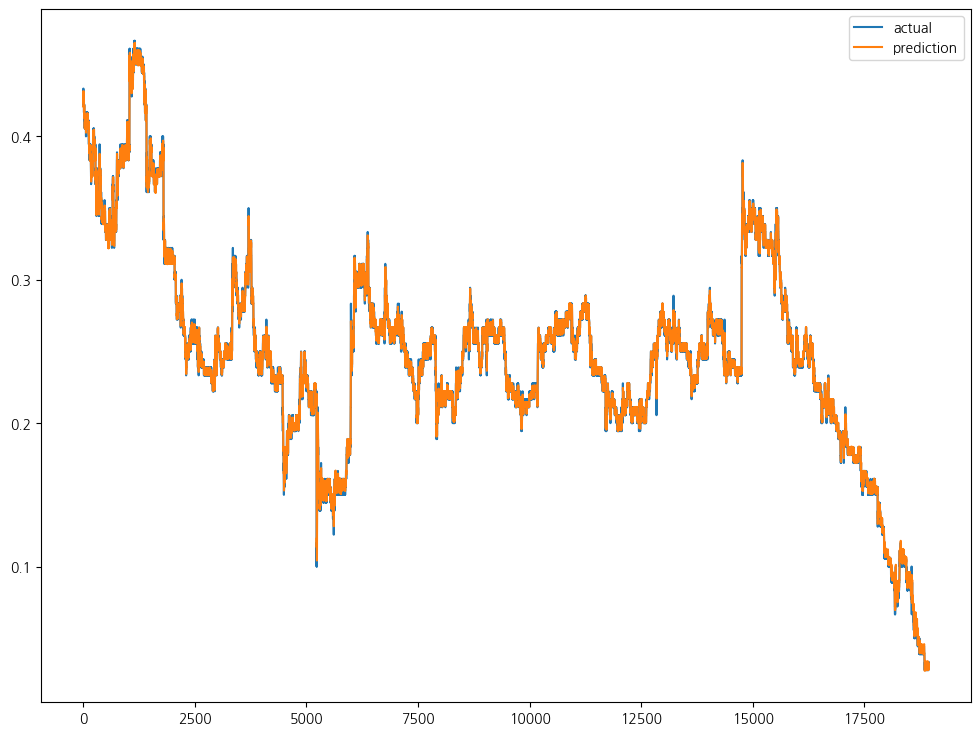

In [96]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()